# Tratamiento de outliers

Buscamos outliers usando las variables de movimiento propio en las coordenadas RA y DE. Las estrellas del mismo cúmulo tendrán pmRA y pmDE parecidos, ya que nacieron juntas y su movimiento alrededor del centro galáctico es precido. Se espera que nuestros dataset sigan una distribución normal, por lo que la identificación de outlier se hace mediante el cálculo de un rango usando la media y la desviación estándar:

- lim_superior = media +k*sigma
- lim_inferior = media -k*sigma

siendo sigma la desviación estándar y k un parámetro de estimación del intervalo. Las estrellas que se consideren outliers por este método significa que no son estrellas del cúmulo, sino estrellas del fondo tomadas por error. Debido a esto, se eliminarán del dataset, ya que no tiene sentido ningún tipo de sustitución por métrica estadística. El dato no es átipico, sino que no debería estar en nuestro dataset.

- Rubén: NGC2682' 'NGC6791' 'NGC6811' 'NGC6819' 'NGC7789' 'Pleiades' 'NGC869'
 'NGC1662' 'Basel11B' 'NGC1528' 'NGC2252' 'Basel4' 'NGC1960' 'NGC6205'
 'Waterloo2' 'Berkeley71' 'Berkeley53' 'IC166' 'King5' 'King7' 'M107'
 'M13' 'M15' 'M2' 'M3' 'M5' 'NGC2099' 'NGC1746' 'NGC1039'
- Silvia: 'NGC1647' 'NGC2183' 'NGC1912' 'NGC2281' 'NGC2420' 'NGC2158' 'NGC2808' 'NGC6266'
 'NGC2532' 'IC2395' 'NGC752' 'NGC2632' 'NGC2168' 'NGC884' 'NGC1851'
 'NGC1904' 'NGC0104' 'M53' 'M67' 'M71' 'M92' 'NGC1245' 'NGC1798' 'NGC188'
 'NGC0362' 'NGC5139' 'NGC3201' 'NGC5286' 'NGC5904'
- Tatiana: 'NGC6218' 'NGC6093' 'NGC6388' 'NGC6522' 'NGC6254' 'NGC6293' 'NGC6441' 'NGC6541' 'NGC6624'
 'NGC7078' 'NGC6656' 'NGC6681' 'NGC6752' 'NGC7089' 'NGC1261' 'NGC7099'
 'IC1805' 'IC2944' 'NGC2244' 'NGC2362' 'NGC3293' 'NGC4755' 'NGC6193'
 'Trumpler16' 'NGC6139' 'NGC6362' 'NGC6397' 'NGC6712' 'Pal13'

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tools import pm_analysis

In [242]:
keys = ['NGC6218', 'NGC6093', 'NGC6388', 'NGC6522','NGC6254', 'NGC6293', 'NGC6441', 'NGC6541', 'NGC6624', 'NGC7078','NGC6656','NGC6681','NGC6752','NGC7089','NGC1261','NGC7099','IC1805','IC2944', 'NGC2244', 'NGC2362', 'NGC3293', 'NGC4755', 'NGC6193', 'Trumpler16', 'NGC6139', 'NGC6362', 'NGC6397', 'NGC6712', 'Pal13']

dic={}

N_Stars: 376
N_Valid: 341
90.69%


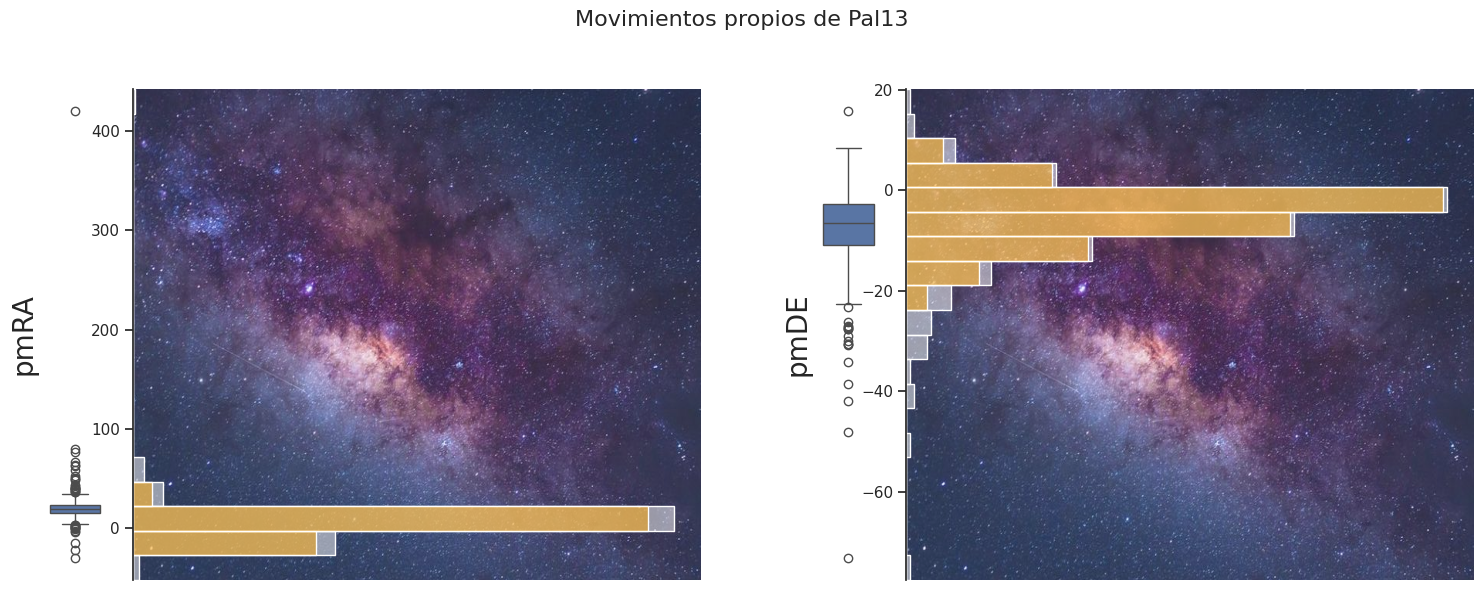

In [306]:
n = 28
k = 1.5
valid = pm_analysis(k, keys[n])
dic[keys[n]]=k

In [308]:
print(len(dic))
print(len(keys))

29
29


In [309]:
print(dic)

{'NGC6218': 1.5, 'NGC6093': 1, 'NGC6388': 1, 'NGC6522': 1.5, 'NGC6254': 1, 'NGC6293': 1, 'NGC6441': 0.8, 'NGC6541': 1, 'NGC6624': 1.5, 'NGC7078': 1.5, 'NGC6656': 1.5, 'NGC6681': 1.5, 'NGC6752': 1.5, 'NGC7089': 1.5, 'NGC1261': 2, 'NGC7099': 2, 'IC1805': 2, 'IC2944': 1.5, 'NGC2244': 1.5, 'NGC2362': 1, 'NGC3293': 1.8, 'NGC4755': 1.8, 'NGC6193': 3.1, 'Trumpler16': 3.1, 'NGC6139': 2.5, 'NGC6362': 2.5, 'NGC6397': 2.1, 'NGC6712': 2, 'Pal13': 1.5}


In [315]:
data_tuples = [(k, v) for k, v in dic.items()]
outlierstreatment_tati = pd.DataFrame(data_tuples, columns=['Cluster', 'k'])
outlierstreatment_tati.to_csv('../Samples/Auxiliar/OutTreatment_Tatiana.csv')